In [3]:
import pandas as pd

# Load the dataset
file_path = '/Users/joey/Desktop/BU/CS506/ds-boston-transit-air-quality/fa23-team-a/data/airnow_cleaned.csv'
air_quality_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
air_quality_data.head()


,SiteName,Latitude,Longitude,PM25_AQI,NO2_AQI,Year
0,BOSTON-KENMORE,42.348900,-71.097702,28.983500,9.816883,2020
1,Boston - Roxbury,42.329399,-71.082497,23.850894,8.920702,2020
2,BOSTON-KENMORE,42.348900,-71.097702,28.235131,9.604732,2021
3,Boston - Roxbury,42.329399,-71.082497,20.880625,9.058315,2021
4,BOSTON-KENMORE,42.348900,-71.097702,27.728759,10.868349,2022


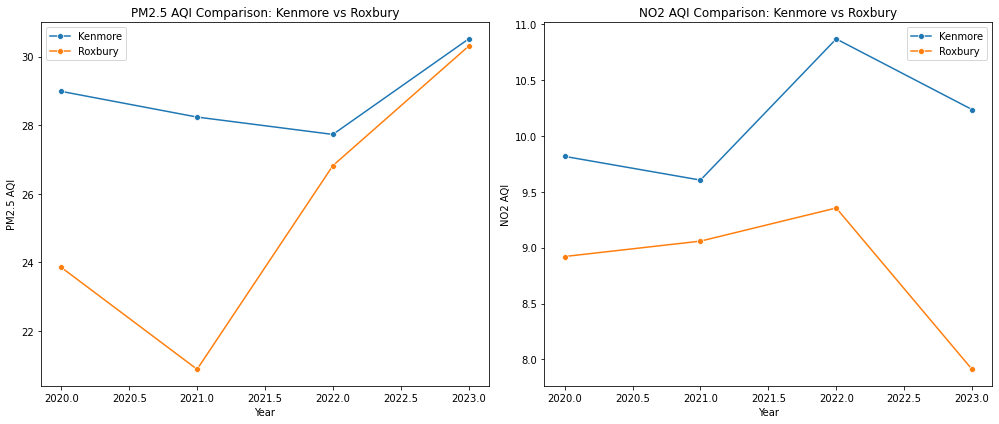

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'

import seaborn as sns

# Filter the data for Roxbury and Kenmore
kenmore_data = air_quality_data[air_quality_data['SiteName'] == 'BOSTON-KENMORE']
roxbury_data = air_quality_data[air_quality_data['SiteName'] == 'Boston - Roxbury']

# Setting up the plot
plt.figure(figsize=(14, 6))

# PM2.5 AQI comparison
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='PM25_AQI', data=kenmore_data, marker='o', label='Kenmore')
sns.lineplot(x='Year', y='PM25_AQI', data=roxbury_data, marker='o', label='Roxbury')
plt.title('PM2.5 AQI Comparison: Kenmore vs Roxbury')
plt.ylabel('PM2.5 AQI')
plt.xlabel('Year')

# NO2 AQI comparison
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='NO2_AQI', data=kenmore_data, marker='o', label='Kenmore')
sns.lineplot(x='Year', y='NO2_AQI', data=roxbury_data, marker='o', label='Roxbury')
plt.title('NO2 AQI Comparison: Kenmore vs Roxbury')
plt.ylabel('NO2 AQI')
plt.xlabel('Year')

plt.tight_layout()
plt.show()


In [6]:
file_path_demographics = '/Users/joey/Desktop/BU/CS506/ds-boston-transit-air-quality/fa23-team-a/data/extension_combined.csv'

df_demographics = pd.read_csv(file_path_demographics)

# Filtering data for Kenmore and Roxbury from the demographics dataset
kenmore_data = df_demographics[df_demographics['Name'] == 'Kenmore']
roxbury_data = df_demographics[df_demographics['Name'] == 'Roxbury']

# Creating a summary dataframe for air quality comparison
air_quality_summary = df_demographics.groupby(['Name', 'Year'])[['PM25_AQI', 'NO2_AQI']].mean().reset_index()


<Figure size 720x432 with 0 Axes>

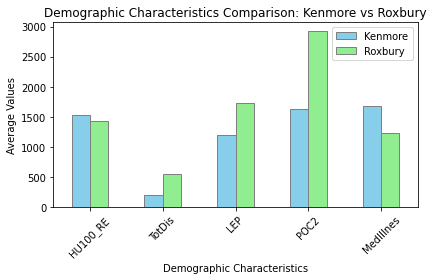

In [13]:
# Selecting relevant demographic columns for comparison
demographic_columns = ['HU100_RE', 'TotDis', 'LEP', 'POC2', 'MedIllnes']

# Creating separate dataframes for Kenmore and Roxbury with average values of demographic data
kenmore_demo_avg = kenmore_data[demographic_columns].mean()
roxbury_demo_avg = roxbury_data[demographic_columns].mean()

# Creating a dataframe for comparison
demo_comparison = pd.DataFrame({'Kenmore': kenmore_demo_avg, 'Roxbury': roxbury_demo_avg})

# Plotting the demographic characteristics comparison
plt.figure(figsize=(10, 6))
demo_comparison.plot(kind='bar', color=['skyblue', 'lightgreen'], edgecolor='grey')
plt.title('Demographic Characteristics Comparison: Kenmore vs Roxbury')
plt.ylabel('Average Values')
plt.xlabel('Demographic Characteristics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- **HU100_RE**:
    - Housing units
- **TotDis**:
    - Total Disability
- **LEP**:
    - Limited English Proficiency
- **POC2**:
    - People of Color
- **MedIllnes**:
    - Medical Illness